In [1]:
# dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# raw data files
ardd_path = "data_raw/ardd_fatalities Sep 2020.csv"

# read the mouse data and the death by type rate
# add header = 1 to remove the extra row in the CSV file
ardd = pd.read_csv(ardd_path)

ardd.head(1)

/Users/theoscat/opt/anaconda3/envs/bcs/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20202012,Vic,9,2020,Monday,3:11,Single,-9,-9,-9,...,16,Inner Regional Australia,Bendigo,Greater Bendigo (C),National or State Highway,No,No,0_to_16,Weekend,Night


In [5]:
# remove unwanted columns "National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type"
clean_ardd = ardd.drop(columns=["National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type"])



# gather latest and earliest year for the title
min_year = clean_ardd["Year"].min()
max_year = clean_ardd["Year"].max()

# replace the "_" with " " in column "Age Group"
clean_ardd["Age Group"] = clean_ardd["Age Group"].str.replace("_"," ")

# remove the ":" in column "Time"
clean_ardd["Time"] = clean_ardd["Time"].str.replace(":","")

# replace "-9" with Unknown as described in the data dictionary
clean_ardd=clean_ardd.replace({"-9":"Unknown"})
clean_ardd.head(1)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20202012,Vic,9,2020,Monday,311,Single,Unknown,Unknown,Unknown,Unknown,Passenger,Male,16,No,No,0 to 16,Weekend,Night


In [6]:
clean_ardd['Gender'].value_counts()

Male           36980
Female         14714
Unknown           26
Unspecified        1
Name: Gender, dtype: int64

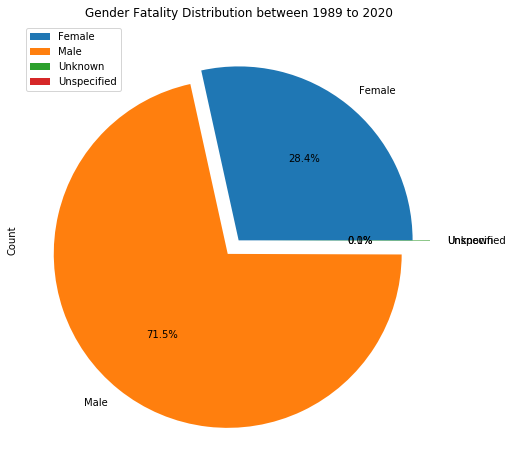

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_ardd[["Crash ID","Gender"]]
groupby_gender = gender_df.groupby(["Gender"])

# calculate count
count = groupby_gender["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_gender_df = pd.DataFrame({"Count": count
                           })

# set the explode value
explode=[0,0.1,0.1,0.1]
plot = groupby_gender_df.plot.pie(y="Count",explode = explode, figsize=(8,8), startangle=0, autopct="%1.1f%%")
plt.title(f"Gender Fatality Distribution between {min_year} to {max_year}")
plt.show()

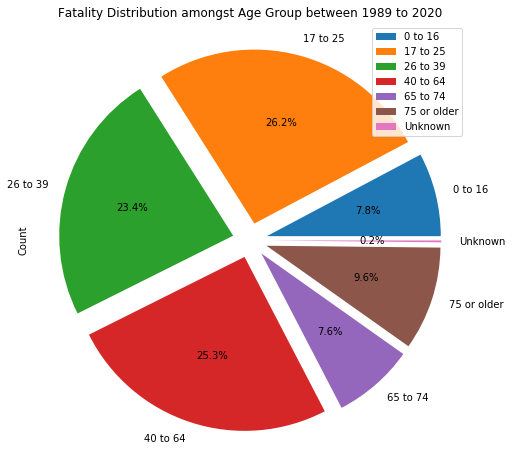

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ageg_df = clean_ardd[["Crash ID","Age Group"]]
groupby_ageg = ageg_df.groupby(["Age Group"])

# calculate count
count = groupby_ageg["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_ageg_df = pd.DataFrame({"Count": count
                           })

# set the explode value
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]

plot = groupby_ageg_df.plot.pie(y="Count",explode = explode, figsize=(8,8), startangle=0, autopct="%1.1f%%")
plt.title(f"Fatality Distribution amongst Age Group between {min_year} to {max_year}")
plt.show()

In [10]:
# capture fatality data after 2000
df = clean_ardd[clean_ardd.Time != "Unknown"]
df['Year'] = df['Year'].astype(int)
df = df.loc[df['Year'] >= 2000]
df.head()

/Users/theoscat/opt/anaconda3/envs/bcs/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20202012,Vic,9,2020,Monday,311,Single,Unknown,Unknown,Unknown,Unknown,Passenger,Male,16,No,No,0 to 16,Weekend,Night
1,20202008,Vic,9,2020,Saturday,2255,Multiple,Unknown,Unknown,Unknown,Unknown,Driver,Male,27,No,No,26 to 39,Weekend,Night
2,20203042,Qld,9,2020,Thursday,2300,Single,No,No,No,100,Driver,Male,31,No,No,26 to 39,Weekday,Night
3,20203024,Qld,9,2020,Friday,1800,Single,No,No,No,80,Motorcycle rider,Male,29,No,No,26 to 39,Weekend,Night
4,20202070,Vic,9,2020,Sunday,800,Single,Unknown,Unknown,Unknown,Unknown,Driver,Male,20,No,No,17 to 25,Weekend,Day


In [11]:
# capture fatality data after year 2010
c_df = df.loc[df['Year'] >= 2010]
c_df = df.Time.value_counts().reset_index().rename(columns={'index': 'Time', 'Time': 'Count'})

# update data type to integer
c_df['Time'] = c_df['Time'].astype(int)

# sort result by Time
c_df = c_df.sort_values(by='Time', ascending=True)
c_df

,Time,Count
22,0,236
101,1,69
343,2,9
697,3,4
631,4,5
...,...,...
199,2355,43
847,2356,4
771,2357,4
372,2358,8


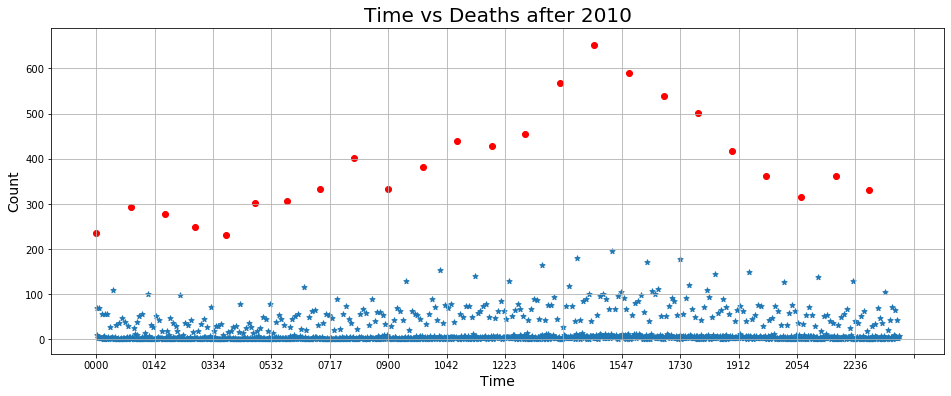

In [98]:
# plot graph to show Time vs Deaths after 2010
fig, ax = plt.subplots(figsize=(16, 6))
# marker_size=5

# arrange the x interval
plt.xticks(np.arange(0, 2400, step=100))

plt.scatter(c_df['Time'].map("{:04}".format),c_df['Count'], s= 30 ,marker = "*")
plt.title('Time vs Deaths after 2010',fontsize =20)
plt.xlabel('Time',fontsize =14)
plt.ylabel('Count',fontsize =14)
ax.grid()

# highlight the number of fatalities that's with the greatest trend
cc_df = c_df.query('Count >= 200')
plt.scatter(cc_df["Time"].map("{:04}".format), cc_df["Count"],  alpha=1, color="red" , marker="o")

plt.show()

In [ ]:
# # df = clean_ardd[clean_ardd.Time != "Unknown"]
# df = df[["Time","Dayweek"]]
# df["Dayweek No."] = df["Dayweek"].str.replace('Monday','1')\
# .replace('Tuesday',"2")\
# .replace('Wednesday',"3")\
# .replace('Thursday',"4")\
# .replace('Friday',"5")\
# .replace('Saturday',"6")\
# .replace('Sunday',"7")
# df = df.sort_values(by=['Dayweek No.'], ascending=True)
# df

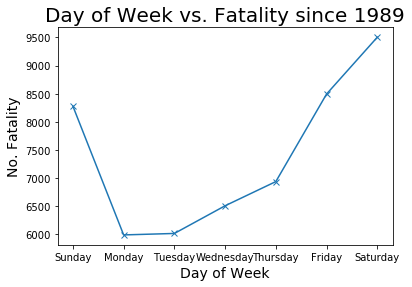

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dc_df = clean_ardd[["Dayweek","Crash ID"]]

# group by the Day of Week and count the number of fatality
groupby_dayweek = dc_df.groupby(["Dayweek"])

# calculate count
count = groupby_dayweek["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_dayweek_df = pd.DataFrame({"Count": count
                           })

# manually rearrange the Day of Week index
groupby_dayweek_df = groupby_dayweek_df.reindex(['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'])

# plot the graph
plt.plot(groupby_dayweek_df, marker = "x")

plt.title(f"Day of Week vs. Fatality since {min_year}",fontsize =20)
plt.ylabel("No. Fatality",fontsize =14)
plt.xlabel("Day of Week",fontsize =14)
plt.show()